In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import torch
from torch import nn

from src.data.ShapeManager import Data
from src.data.SkeletonFrame import SkeletonFrame
from scripts.train_seq2seq import *


import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
data = np.load('./data/test16.npy')
sequences = np.loadtxt('./data/TestSequences.txt')

input_data = Data(data, np.load('./data/input_norm.npy'), "input", sequences)
output_data = Data(data, np.load('./data/output_norm.npy'), "output", sequences)

In [3]:
class Seq2Seq:
    def __init__(self):
        self.MAX_LENGTH = 100
        self.input_size = 575
        self.encoder = torch.load('models/seq2seq/encoder.pt')
        self.decoder = torch.load('models/seq2seq/decoder.pt')

    def encode(self, input_tensor):
        encoder_hidden = self.encoder.initHidden()
        input_length = input_tensor.size(0)
        encoder_outputs = torch.zeros(MAX_LENGTH, self.encoder.hidden_size).cuda()

        for ei in range(input_length):
            encoder_output, encoder_hidden = self.encoder(input_tensor[ei], encoder_hidden)
            encoder_outputs[ei] = encoder_output[0, 0]
        return encoder_outputs, encoder_hidden

    def decode(self, decoder_input, decoder_hidden, encoder_outputs):
        decoder_outputs = torch.zeros(self.MAX_LENGTH, self.input_size).cuda()

        for di in range(MAX_LENGTH):
            decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
            decoder_input = decoder_output.squeeze().detach()
            decoder_outputs[di] = decoder_output

        return decoder_outputs
    
    def predict(self, input_data):
        input_tensor = torch.from_numpy(input_data.astype(np.float32)).cuda()
        encoder_outputs, encoder_hidden = self.encode(input_tensor)        
        prediction_data = self.decode(input_tensor[-1], encoder_hidden, encoder_outputs)
        return prediction_data.cpu().detach().numpy()
    
    def predict_next(self, input_data):
        pass

In [4]:
input_numpy = input_data(0).data

In [5]:
seq = Seq2Seq()
prediction_data = seq.predict(input_numpy[:100, :575])
prediction = Data(np.zeros(575), np.load('./data/input_norm.npy')[:,:575], "input", sequences)
prediction.set_normed(prediction_data)

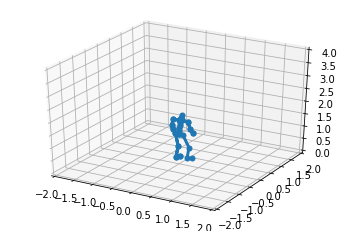

In [6]:
frame = SkeletonFrame(prediction[20])

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlim3d(-2,2)
ax.set_ylim3d(-2,2)
ax.set_zlim3d(0,4)

frame.draw_character(ax)
plt.show()

In [8]:
prediction_data = decode(decoder, input_tensor[100], encoder_hidden, encoder_outputs)

NameError: name 'decode' is not defined

In [9]:
prediction = Data(np.zeros(575), np.load('./data/input_norm.npy')[:,:575], "input", sequences)
prediction.set_normed(prediction_data.cpu().detach().numpy())

frame = SkeletonFrame(prediction[0])

AttributeError: 'numpy.ndarray' object has no attribute 'cpu'

In [10]:
anim = Animation()
anim.add_frames([SkeletonFrame(x) for x in prediction])

NameError: name 'Animation' is not defined

In [15]:
from src.data.Animation import Animation

def update():
    pass

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlim3d(-2,2)
ax.set_ylim3d(-2,2)
ax.set_zlim3d(0,4)

anim.FuncAnimation(self.fig, update, len(self.animations[0]), interval = 1000 / 120., blit=True)

frame.draw_character(ax)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

AttributeError: module 'matplotlib.pyplot' has no attribute 'FuncAnimation'